<h1>TeTe (TEKAM): Het voorspellinsmodel voor borstkanker(Breast Cancer prediction)</h1>

<i>Verder in dit document wordt verwezen naar het voorspellingsmodel voor borstkanker als TeTe.</i>
Het voorspellingsmodel voor borstkanker is bedoeld om door middel van verschillende modellen na te gaan hoe nauwkeurig  de diagnose is. De dataset bestaat uit gegevens van verschillende patienten en dient eerst voorbereid en geanalyseerd te worden. Voor de nauwkeurigheid wordt gebruikt gemaakt van een confusion matrix. Het resultaat wordt gepresenteerd in een tabel en gevisualiseerd in een heatmap.

De algoritme is bedoeld om op basis van de eigenschappen (features) van een cel van de borstmassa, de diagnose van borstkanker van patienten te voorspellen.
De algoritme voor breast cancer prediction wordt onderverdeeld in 5 fases: <br>
<ul>
    <li>Dataset voorbereiden en verkennen </li>
    <li>Dataset splitsen in training en test</li>
    <li>Dataset transformeren door gebruik te maken van schalen</li>
    <li>Bouwen van het model /Selecteren van de algoritme voor het voorspellen van de beste resultaten</li>
</ul>

<h2>Fase 1: Voorbereiden en verkennen van de dataset</h2>

<h3>Importeren van de benodigde libraries.</h3>
<p>Voor het uitvoeren van de algoritme wordt gebruik gemaakt van verschillende libraries. Als eerst wordt deze libraries geimporteerd.</p>

In [4]:
#Libraries 
import numpy as np #
import pandas as pd #
import matplotlib.pyplot as plt #
import seaborn as sns #

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

<h3>Dataset</h3>
<p>Er wordt voor dit dataset gebruikt gemaakt van 
<a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data">de Breast Cancer Wisconsin (Diagnostic) Data Set.</a> Deze dataset bestaat uit de diagnose van de borstkanker en 30 eigenschappen van een cel aanwezig in de digitale beeld van een dunne naald (Fine Needle Aspirate (FNA)) van een borstmassa. Hieronder worden de attributen van de dataset weergegeven.    
</p>

<b>Attribute Information:</b><br>
ID number<br>
Diagnosis (M = malignant, B = benign)<br>
<br>
<b>Ten real-valued features are computed for each cell nucleus:</b><br>
Radius (mean of distances from center to points on the perimeter)<br>
Texture (standard deviation of gray-scale values)<br>
Perimeter<br>
Area<br>
Smoothness (local variation in radius lengths)<br>
Compactness (perimeter² / area — 1.0)<br>
Concavity (severity of concave portions of the contour)<br>
Concave points (number of concave portions of the contour)<br>
Symmetry<br>
Fractal dimension (“coastline approximation” — 1)<br>

<br>
The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius


Hieronder wordt een overzicht gegeven van de variabelen en hun datatypes van de dataset,

In [11]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<p>
Vervolgens wordt er een verkenning en een analyze van de dataset gedaan om de kwaliteit van de dataset te verhogen, zodat de nauwkeurigheid van de algoritme ook wordt verhoogd.

Eerst wordt de dataset geimporteerd. Vervolgens wordt de eerste 10 rijen in de dataset geprint. </p>

In [8]:
#Load dataset(data .csv)
df = pd.read_csv("data.csv")
df.head(10) # geeft de eerste 10 rijen in van de dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


<p>In de onderstaande tabel wordt een statische samenvatting gegeven van de dataset. </p>

In [9]:
#data describe 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<p>
 Deze dataset bestaat uit 569 rijen en 33 kolommen. Dit betekent dat er data zijn van 569 patienten. Van elk patient die geidentifeerd is met een idnummer wordt een totaal van 30 eigenschappen (features) weergegeven.<br>
 In deze dataset is te zien dat een patient kan worden gediagnoseerd met de volgende type cancer:
<ul>
     <li>Malign (M) : kwaadardige vorm van borstkanker</li>
     <li>Belign (B): goedaardige vorm van borstkanker</li>
</ul>
Deze algoritme moet voor elke patient de diagnose gaat voorspellen op base van de 30 eigenschappen.<br>
We gaan dus de kolom <i>diagnosis</i> voorspellen
 </p>

In [10]:
df.shape

(569, 33)

In [ ]:
df['diagnosis'].value_counts()

Er is hier te zien dat deze dataset bestaat uit 357 patienten met goedaardig borstkanker en 212 patient met kwaadaardig borstkanker. Aan de hand van de volgende figuur wordt het resultaat gevisualiseerd.

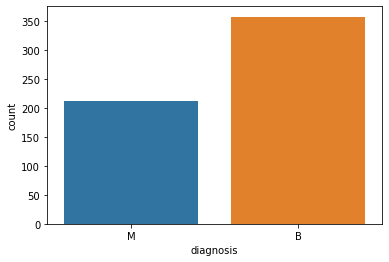

In [32]:
sns.countplot(df['diagnosis'])

In [33]:
df_corr = df.corr()
df.corr

<bound method DataFrame.corr of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8

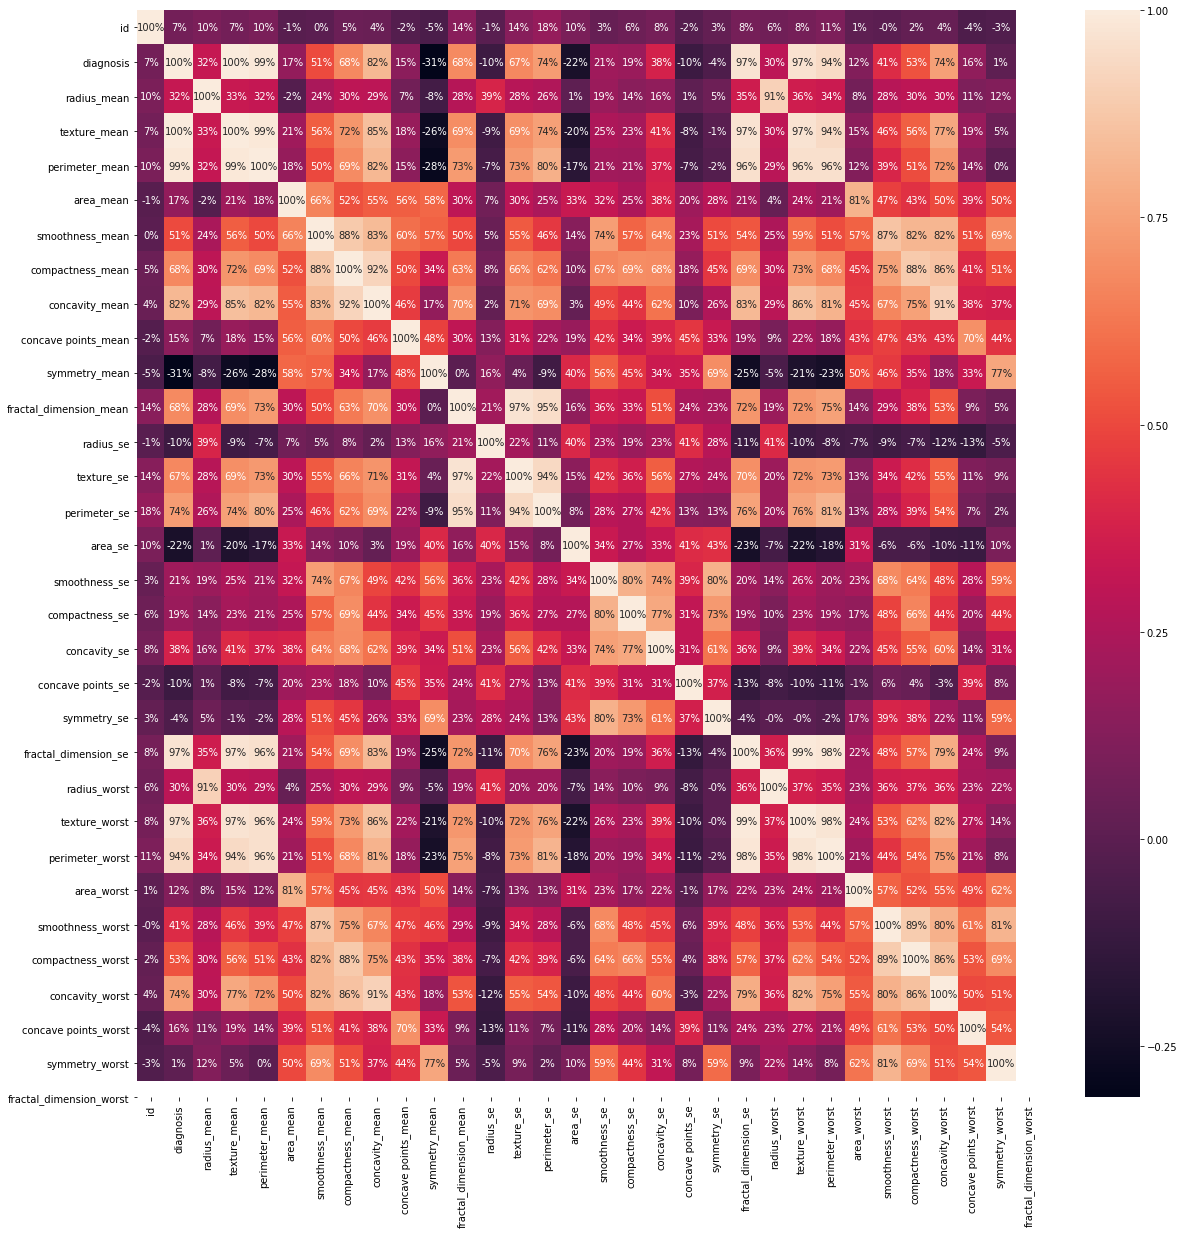

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, cbar=True, annot=True, fmt='.0%', yticklabels=df.columns,
            xticklabels=df.columns)
plt.show()

<p>
    The highest correlations are between:

    perimeter_mean and radius_worst;
    area_worst and radius_worst;
    perimeter_worst and radius_worst, perimeter_mean, area_worst, area_mean, radius_mean;
    texture_mean and texture_worst;

</p>

In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

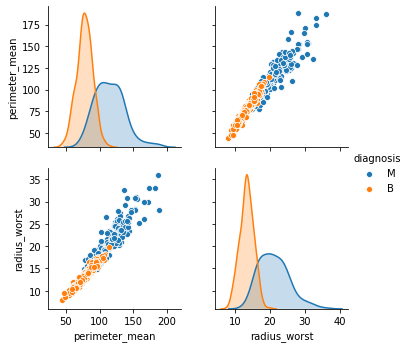

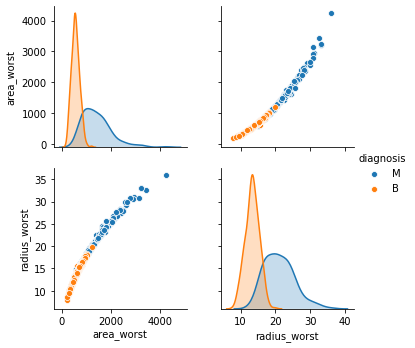

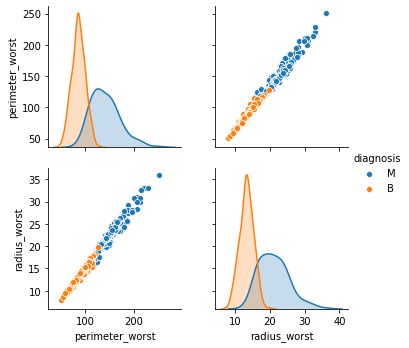

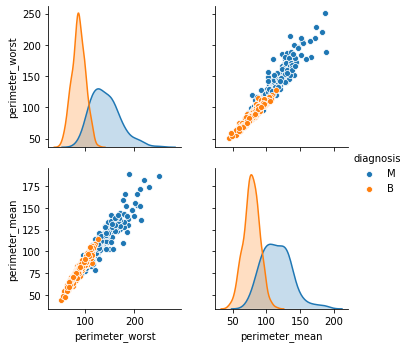

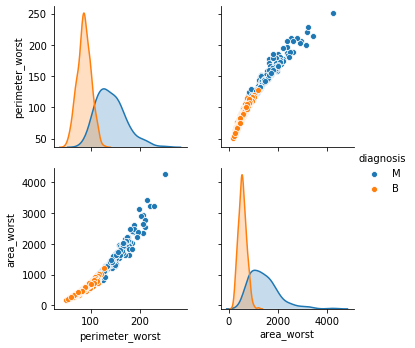

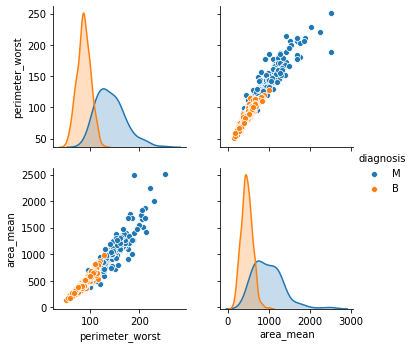

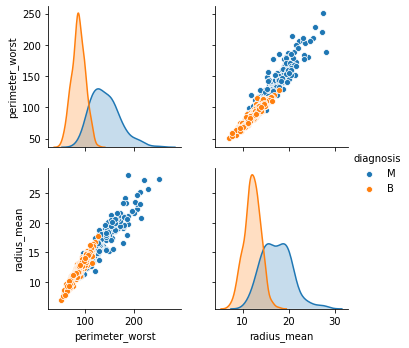

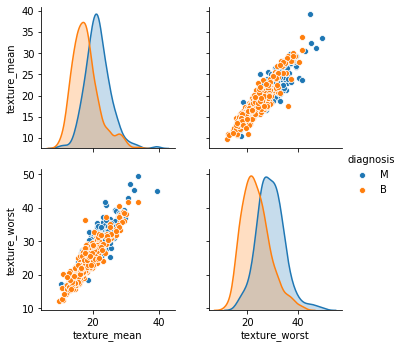

In [17]:
# de eerste 10 variabelen uit sns plotten

sns.pairplot(df, hue = 'diagnosis',  vars = ['perimeter_mean','radius_worst'])
sns.pairplot(df, hue = 'diagnosis',  vars = ['area_worst', 'radius_worst'])
sns.pairplot(df, hue = 'diagnosis',  vars = ['perimeter_worst', 'radius_worst'])
sns.pairplot(df, hue = 'diagnosis',  vars = ['perimeter_worst', 'perimeter_mean'])
sns.pairplot(df, hue = 'diagnosis',  vars = ['perimeter_worst', 'area_worst'])
sns.pairplot(df, hue = 'diagnosis',  vars = ['perimeter_worst', 'area_mean'])
sns.pairplot(df, hue = 'diagnosis',  vars = ['perimeter_worst', 'radius_mean'])
sns.pairplot(df, hue = 'diagnosis',  vars = ['texture_mean', 'texture_worst'])

plt.show()

#Oranje is Malign en blauw is Belign

<p>In deze gedeelte gaan we alle missing or null data identificeren en verwijderen</p>

In [18]:
df.isnull().sum()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [19]:
df = df.dropna(axis = 1)

In [20]:
df.shape

(569, 32)

<h2>FASE 2: Dataset splitsen in training en test</h2>

Voor deze fase  gaan we de dataset splitsen in dataset X en Y. <br>
X = data van de features die wordt gebruikt om Y te bepalen <br>
Y = diagnostiek , het kolom die we gaan voorspellen.

In [21]:
X = df.iloc[:, 2:32].values
Y = df.iloc[:, 1].values

In [22]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size = 0.25, random_state = 0)

<h2>FASE 3: Dataset transformeren door gebruik te maken van schalen</h2>

<p>In de dataset kom er outlier voor.Outliers zijn data's die relatief ver van de overige data verwijderd ligt. <br>
   We moeten alle functies op hetzelfde niveau brengen. Dit kan worden bereikt door te schalen. Dit betekent dat u uw gegevens transformeert zodat ze binnen een specifieke schaal passen, zoals 0-100 of 0-1.</p>

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>FASE 4: Bouwen van de model.</h2>

<p>In deze fase wordt het model geimplementeerd en daarvan de confusion matrix uitgehaald.</p>

In [25]:
def models(X_train,Y_train):
  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, Y_train)

    print('Random Forest Classifier Training Accuracy:', classifier.score(X_train, Y_train) * 100 )
  
    return classifier


In [26]:
model = models(X_train, Y_train)

Random Forest Classifier Training Accuracy: 99.76525821596243


In [44]:
#Histogram plotten van de X_test
pred = model.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
sns.countplot(pred)
# 1 = Malign( kwaadaardig borstkanker)
# 2 = Belign( goedaardig  borstkanker)

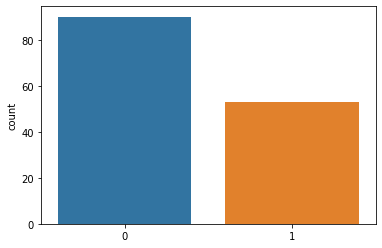

In [28]:
sns.countplot(Y_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Random Forest Classifier  Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

confusion = pd.DataFrame(cm, index = ['True', 'False'],
                         columns = ['negative', 'positive'])
#print confusion matrix in de vorm van een tabel
confusion


[[89  1]
 [ 1 52]]
Model Random Forest Classifier  Testing Accuracy = "0.986013986013986!"



,negative,positive
True,89,1
False,1,52


<p>Er is te zien dat dit model een nauwkeurig voorspelling van ongeveer 99,8% geeft.<br>
Aan de hand van de confusion matrix, wordt er bepaald dat er is sprake van 1 <i>false positve</i> en 1 <i>false negative</i>
</p>


<h2>Applicatie</h2>

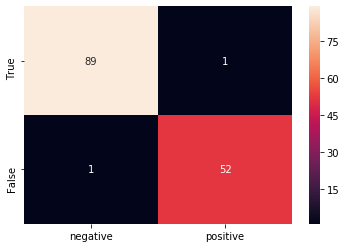

In [30]:
#confusion matrix visualiseren in een heatmap
1
